# My Aim Of the portfolio is to find out if we can we predict the risk of developing cardiovascular disease based on patients' health attributes?. I will Do this By First using KNN clustering to group patients with similar health profiles. Then I will run a linear regession model to predict the risk of cardiovascular disease.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, mean_squared_error, confusion_matrix
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist

In [2]:
# I started By Displaying the Data 
data=pd.read_csv('cardio_data_processed.csv')
data.head()



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [3]:
# I dropped the column becuase it was not encodede properly hence i encoded it properly over the next lines of code
data_cleaned=data.drop('bp_category_encoded',axis=1)


In [4]:
# Encoding the categorical columns

ord_enc = OrdinalEncoder()
# Selecting the columns for encoding
cols_for_encode = ['bp_category']
# Encoding the selected columns
cols_encoded = ord_enc.fit_transform(data_cleaned[cols_for_encode])
# Changing it back into dataframe
data_encode = pd.DataFrame(cols_encoded, columns = cols_for_encode)
# Adding all columns back with the newly changed columns
data_numeric = pd.concat([data_cleaned.drop(cols_for_encode, axis = 1), data_encode], axis = 1)

data_numeric


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,1.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,2.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,1.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,2.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,1.0
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,2.0
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,2.0
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,1.0


In [5]:
# Dropped some rows as dataset is to big 
data_numeric = data_numeric.drop(labels=range(32205, 68205), axis=0)
data_numeric

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,1.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,2.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,1.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,2.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32200,47231,15286,1,164,80.0,120,80,1,2,0,0,0,1,41,29.744200,1.0
32201,47232,20169,1,164,105.0,120,80,1,2,0,0,1,1,55,39.039262,1.0
32202,47233,21247,1,155,50.0,130,90,1,1,0,0,0,1,58,20.811655,1.0
32203,47236,21255,1,148,67.0,130,80,1,1,0,0,1,0,58,30.588020,1.0


In [6]:
# I calculated some basic statistics
data_numeric.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
count,32205.000000,32205.000000,32205.000000,32205.000000,32205.000000,32205.000000,32205.000000,32205.000000,32205.000000,32205.000000,32205.000000,32205.000000,32205.000000,32205.000000,32205.000000,32205.000000
mean,23597.706319,19446.048005,1.350070,164.433504,74.103227,126.435491,81.264493,1.358174,1.223599,0.088899,0.053128,0.803136,0.490514,52.775408,27.506577,1.468406
std,13649.076683,2480.286421,0.476999,8.181370,14.267429,16.036638,9.156798,0.674966,0.569885,0.284603,0.224293,0.397635,0.499918,6.805381,6.368020,0.785478
min,0.000000,10798.000000,1.000000,55.000000,22.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,7.022248,0.000000
25%,11786.000000,17629.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,1.000000
50%,23601.000000,19689.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.297578,1.000000
75%,35396.000000,21314.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116002,2.000000
max,47238.000000,23690.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667,3.000000


In [7]:
# checking for any more categorial columns
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32205 entries, 0 to 32204
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           32205 non-null  int64  
 1   age          32205 non-null  int64  
 2   gender       32205 non-null  int64  
 3   height       32205 non-null  int64  
 4   weight       32205 non-null  float64
 5   ap_hi        32205 non-null  int64  
 6   ap_lo        32205 non-null  int64  
 7   cholesterol  32205 non-null  int64  
 8   gluc         32205 non-null  int64  
 9   smoke        32205 non-null  int64  
 10  alco         32205 non-null  int64  
 11  active       32205 non-null  int64  
 12  cardio       32205 non-null  int64  
 13  age_years    32205 non-null  int64  
 14  bmi          32205 non-null  float64
 15  bp_category  32205 non-null  float64
dtypes: float64(3), int64(13)
memory usage: 3.9 MB


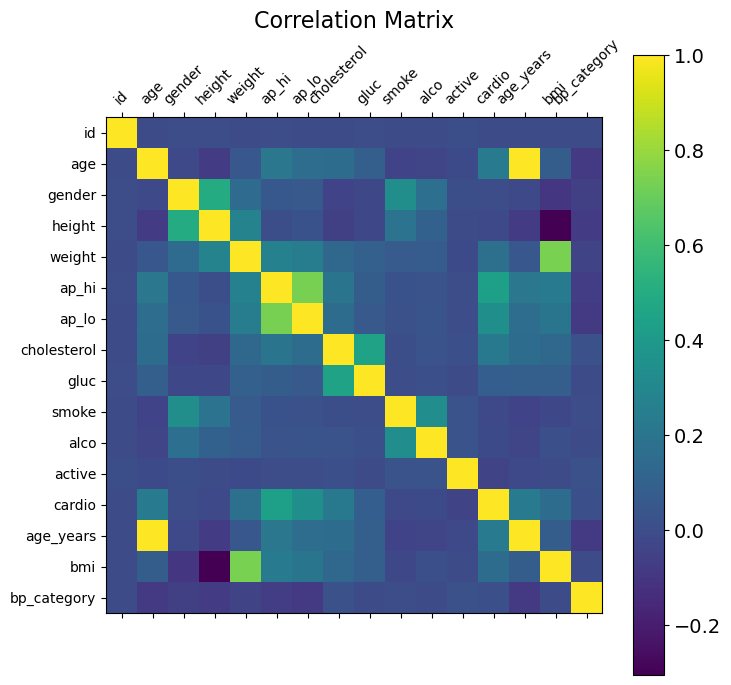

In [8]:
# Analysing the correlation between each of the features
f = plt.figure(figsize=(8, 8))
plt.matshow(data_numeric.corr(), fignum=f.number)
plt.xticks(range(data_numeric.select_dtypes(['number']).shape[1]), data_numeric.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(data_numeric.select_dtypes(['number']).shape[1]), data_numeric.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [9]:
# Getting target features
X = data_numeric[['age','bmi','cholesterol','bp_category']]  # Features
y = data_numeric['cardio']  # Target variable

In [10]:
# Running the clusteirng Algorithim
km = KMeans(n_clusters=3)
data_numeric['cluster'] = km.fit_predict(X)

km



/Users/ayushpuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

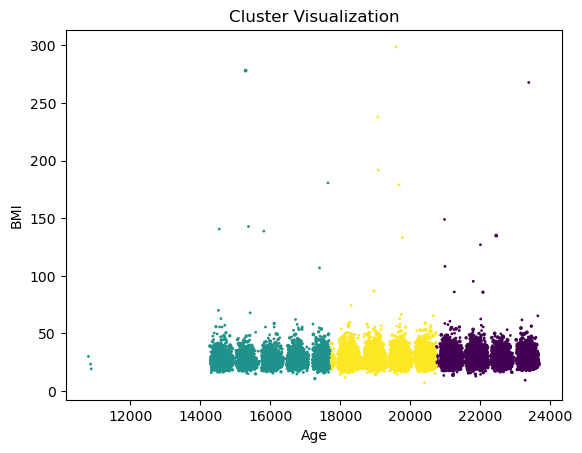

In [11]:
# Visualize the clusters
plt.scatter(data_numeric['age'], data_numeric['bmi'],data_numeric['cholesterol'] ,c=data_numeric['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Cluster Visualization')
plt.show()


In [12]:
# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X, data_numeric['cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5856603432869305


The Silhouette Score is a metric used to evaluate the quality of clusters in a clustering algorithm, such as K-means. It measures how similar each data point in one cluster is to the data points in the same cluster (cohesion) compared to the data points in the nearest cluster (separation). The Silhouette Score ranges from -1 to 1. A  Silhouette Score of 0.586 suggests that the clustering has moderate to good separation and cohesion of clusters, indicating a reasonable quality of clustering

In [13]:
# Initialize a dictionary to store regression models for each cluster
Linear_regression_models = {}
cluster_ids = []
mse_dict = []
rmse_dict = []

In [14]:
# Train a linear regression model for each cluster
for cluster_id in np.unique(data_numeric['cluster']):
    cluster_data = data_numeric[data_numeric['cluster'] == cluster_id]
    cluster_X = cluster_data[['age', 'bmi', 'cholesterol']]
    cluster_y = cluster_data['cardio']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(cluster_X, cluster_y, test_size=0.2, random_state=142)
    
    # Create a linear regression model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    
    # Store the regression model in the dictionary
    Linear_regression_models[cluster_id] = regression_model

    # Evaluate the regression model
    y_predLinear = regression_model.predict(X_test)
    mseLinear = mean_squared_error(y_test, y_predLinear)
    rmseLinear= np.sqrt(mseLinear)
    print(f"Cluster {cluster_id} - Mean Squared Error: {mseLinear}")
    print('root mse;',rmseLinear)
    
    cluster_ids.append(cluster_id)
    mse_dict.append(mseLinear)
    rmse_dict.append(rmseLinear)

print(mse_dict)  

Cluster 0 - Mean Squared Error: 0.2212253268090724
root mse; 0.47034596501838133
Cluster 1 - Mean Squared Error: 0.1959219407346939
root mse; 0.4426307046903704
Cluster 2 - Mean Squared Error: 0.23714605855070423
root mse; 0.48697644558099956
[0.2212253268090724, 0.1959219407346939, 0.23714605855070423]


In [15]:
# Initialize a dictionary to store regression models for each cluster
Logistic_regression_models = {}
cluster_idsLog = []
mse_dictLogistic = []
rmse_dictLogistic = []

In [16]:
# Train a Logistic regression model for each cluster
for cluster_id in np.unique(data_numeric['cluster']):
    cluster_data = data_numeric[data_numeric['cluster'] == cluster_id]
    cluster_X = cluster_data[['age', 'bmi', 'cholesterol']]
    cluster_y = cluster_data['cardio']
    
    # Split the data into training and testing sets
    X_train1, X_test1, y_train1, y_test1 = train_test_split(cluster_X, cluster_y, test_size=0.2, random_state=142)
    
    # Create a linear regression model
    regression_modelLog = LogisticRegression()
    regression_modelLog.fit(X_train1, y_train1)
    
    # Store the regression model in the dictionary
    Logistic_regression_models[cluster_id] = regression_modelLog
    
    # Evaluate the regression model
    y_predLogistic = regression_modelLog.predict(X_test1)
    mseLogistic = mean_squared_error(y_test1, y_predLogistic)
    rmseLogistic= np.sqrt(mseLogistic)
    print(f"Cluster {cluster_id} - Mean Squared Error: {mseLogistic}")
    print('root mse;',rmseLogistic)
    
    #Appending to Dictionary
    cluster_idsLog.append(cluster_id)
    mse_dictLogistic.append(mseLogistic)
    rmse_dictLogistic.append(rmseLogistic)
  
    

    
mse_dictLogistic


Cluster 0 - Mean Squared Error: 0.3664367816091954
root mse; 0.605340219718792
Cluster 1 - Mean Squared Error: 0.3290909090909091
root mse; 0.5736644568830364
Cluster 2 - Mean Squared Error: 0.4103935804356133
root mse; 0.6406196847081842


[0.3664367816091954, 0.3290909090909091, 0.4103935804356133]

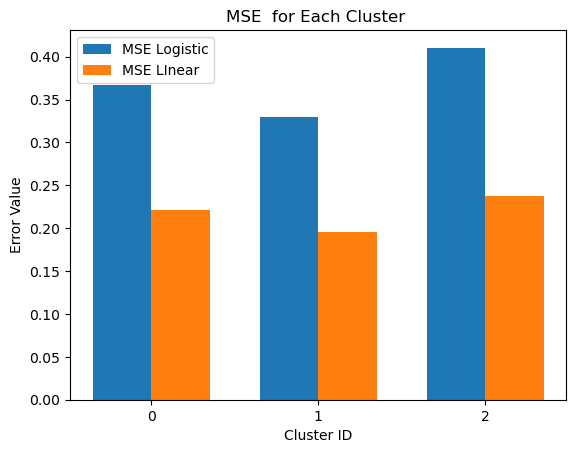

In [17]:
# Graph of MSE For eahc cluster
width = 0.35
x = np.arange(len(cluster_ids))

plt.bar(x, mse_dictLogistic, width, label='MSE Logistic')
plt.bar(x + width, mse_dict, width, label='MSE LInear')
plt.xlabel('Cluster ID')
plt.ylabel('Error Value')
plt.title('MSE  for Each Cluster ')
plt.xticks(x + width / 2, cluster_ids)  # Set cluster IDs as x-axis labels
plt.legend()
plt.show()

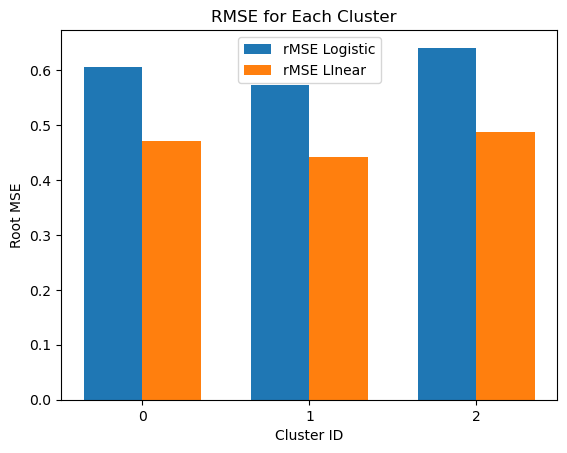

In [18]:
#Graph of root mse for each cluster
width = 0.35
x1 = np.arange(len(cluster_ids))

plt.bar(x1, rmse_dictLogistic, width, label='rMSE Logistic')
plt.bar(x1 + width, rmse_dict, width, label='rMSE LInear')
plt.xlabel('Cluster ID')
plt.ylabel('Root MSE')
plt.title('RMSE for Each Cluster  ')
plt.xticks(x1 + width / 2, cluster_ids)  # Set cluster IDs as x-axis labels
plt.legend()
plt.show()

In [19]:
confusion_matrices = {}
for cluster_id in np.unique(data_numeric['cluster']):
    cluster_data = data_numeric[data_numeric['cluster'] == cluster_id]
    cluster_X = cluster_data[['age', 'bmi', 'cholesterol']]
    cluster_y = cluster_data['cardio']
    
    X_test = cluster_X
    y_test = cluster_y
    
    regression_modelLog = Logistic_regression_models[cluster_id]
    y_pred_logistic = regression_modelLog.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred_logistic)
    cm=pd.DataFrame(cm,  columns=["Predicted Dislike(0)",'Predicted Like(1)'],
                             index=["Actual Dislike(0)",'Actual Like(1)'])
    confusion_matrices[cluster_id] = cm
    
confusion_matrices

{0:                    Predicted Dislike(0)  Predicted Like(1)
 Actual Dislike(0)                     0               4114
 Actual Like(1)                        0               6758,
 1:                    Predicted Dislike(0)  Predicted Like(1)
 Actual Dislike(0)                  5212                150
 Actual Like(1)                     2715                171,
 2:                    Predicted Dislike(0)  Predicted Like(1)
 Actual Dislike(0)                  5448               1484
 Actual Like(1)                     3716               2437}

# Analysis of Confusion Matrix
## Cluster 1
- True Negatives (TN): The model correctly predicted 5212 cases as "Dislike" (no cardiovascular disease), and       these cases indeed had no cardiovascular disease. This indicates the model's ability to correctly identify         individuals without the disease.

- False Positives (FP): The model incorrectly predicted 150 cases as "Like" (having cardiovascular disease), but   
  these cases actually had no cardiovascular disease. This represents cases where the model raised a false alarm  
  or made a false positive prediction.

- False Negatives (FN): The model incorrectly predicted 2715 cases as "Dislike" (no cardiovascular disease), but 
  these cases actually had cardiovascular disease. These are cases where the model missed identifying individuals 
  who are at risk, indicating false negatives.

- True Positives (TP): The model correctly predicted 171 cases as "Like" (having cardiovascular disease), and 
  these cases indeed had cardiovascular disease. These are true positive predictions, showing the model's ability 
  to correctly identify individuals at risk.

## Cluster 2
- True Negatives (TN): The model correctly predicted 5448 cases as "Dislike" (no cardiovascular disease), and 
  these cases indeed had no cardiovascular disease. This indicates the model's ability to correctly identify  
  individuals without the disease within Cluster 1.

- False Positives (FP): The model incorrectly predicted 1484 cases as "Like" (having cardiovascular disease), but 
  these cases actually had no cardiovascular disease. This represents cases where the model raised a false alarm 
  or made a false positive prediction within Cluster 1.

- False Negatives (FN): The model incorrectly predicted 3716 cases as "Dislike" (no cardiovascular disease), but 
  these cases actually had cardiovascular disease. These are cases where the model missed identifying individuals 
  who are at risk, indicating false negatives within Cluster 1.

- True Positives (TP): The model correctly predicted 2437 cases as "Like" (having cardiovascular disease), and 
  these cases indeed had cardiovascular disease. These are true positive predictions, showing the model's ability 
  to correctly identify individuals at risk within Cluster 1.

## Cluster 0
- True Negatives (TN): The model correctly predicted 0 cases as "Dislike" (no cardiovascular disease), and these 
  cases indeed had no cardiovascular disease. This indicates the model's ability to correctly identify individuals 
  without the disease within Cluster 2.
- False Positives (FP): The model incorrectly predicted 4114 cases as "Like" (having cardiovascular disease), but 
  these cases actually had no cardiovascular disease. This represents cases where the model raised a false alarm 
  or made a false positive prediction within Cluster 2.

- False Negatives (FN): The model incorrectly predicted 0 cases as "Dislike" (no cardiovascular disease), but 
  these cases actually had cardiovascular disease. In this case, there are no false negatives, as the model did 
  not miss identifying individuals at risk within Cluster 2.

- True Positives (TP): The model correctly predicted 6758 cases as "Like" (having cardiovascular disease), and 
  these cases indeed had cardiovascular disease. These are true positive predictions, showing the model's ability 
  to correctly identify individuals at risk within Cluster 2.

